## 1 To 9 Digits Recognizer

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('train.csv')
df.shape

(42000, 785)

In [26]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
39968,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


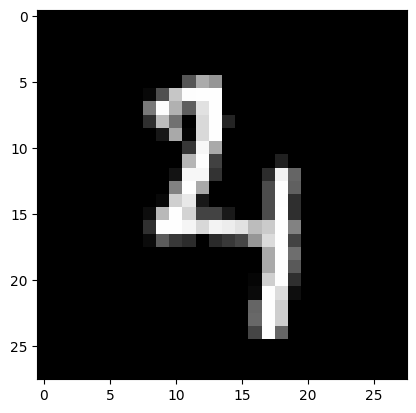

In [28]:
plt.imshow(df.iloc[9619, 1:].values.reshape(28,28), cmap='gray')

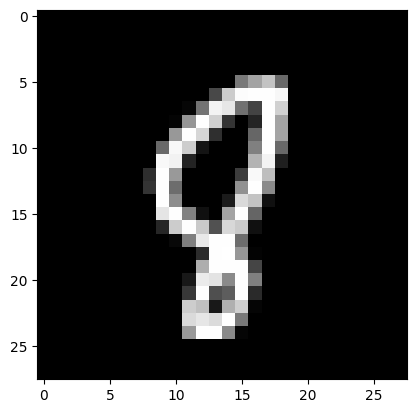

In [29]:
plt.imshow(df.iloc[9620, 1:].values.reshape(28,28), cmap='gray')

In [30]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape, X_test.shape

((33600, 784), (8400, 784))

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [34]:
import time
start_time = time.time()
y_pred = knn.predict(X_test)
print(f"Time taken to predict: {time.time() - start_time} seconds")

Time taken to predict: 9.160147666931152 seconds


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

### Now I Would apply the Concept of CPA and check How can we do the same task with less number of features without loosing the accuracy

### First I would Standardize it.

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Components re now with 95% dataCoverage(90)

In [54]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_95 = pca.fit_transform(X_train)
X_test_95 = pca.transform(X_test)

In [55]:
X_train_95.shape, X_test_95.shape

((33600, 95), (8400, 95))

In [56]:
knn = KNeighborsClassifier()
knn.fit(X_train_95, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [57]:
y_pred = knn.predict(X_test_95)
accuracy_score(y_test, y_pred)

0.9420238095238095

### Components are Now 100

In [46]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X_train_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)

In [47]:
X_train_transformed.shape, X_test_transformed.shape

((33600, 100), (8400, 100))

In [49]:
knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [50]:
y_pred = knn.predict(X_test_transformed)

In [51]:
accuracy_score(y_test, y_pred)

0.9428571428571428

### Now data would be in 2-Dimentional mean only 2 features would represent the whole data

In [58]:
pca = PCA(n_components= 2)
X_train_2 = pca.fit_transform(X_train)
X_test_2 = pca.transform(X_test)

In [59]:
X_train_2.shape

(33600, 2)

### We mostly used the PCA to make it to 2Dimentional for visualization and better representation

In [68]:
import plotly.express as px
y_train_2 = y_train.astype(str)
fig = px.scatter(x = X_train_2[:,0],
                 y = X_train_2[:,1],
                 color = y_train_2,
                 color_discrete_sequence = px.colors.sequential.Plasma_r,
                 labels={'color': 'Digit'})
fig.show()


### Now data would be in 3-Dimentional mean only 3 features would represent the whole data for better snapshot(like in match for more varianca visualization)

In [69]:
pca = PCA(n_components= 3)
X_train_3 = pca.fit_transform(X_train)
X_test_3 = pca.transform(X_test)

In [70]:
X_train_3.shape

(33600, 3)

In [71]:
X_train_3

array([[ 0.55374925,  0.94234889, -0.78994008],
       [-1.77963108, -0.89092955,  0.2645034 ],
       [-0.12923706,  1.89647719, -0.25860369],
       ...,
       [ 1.59031145, -0.72389592,  0.02543601],
       [-2.02410332, -0.75505947,  0.54852451],
       [-1.9004016 , -0.91563026,  1.82397459]], shape=(33600, 3))

In [74]:
y_train_3 = y_train.astype(str)
fig = px.scatter_3d(x = X_train_3[:,0],
                 y = X_train_3[:,1],
                 z = X_train_3[:,2],
                 color = y_train_3,
                 color_discrete_sequence = px.colors.sequential.Plasma_r,
                 labels={'color': 'Digit'})
fig.show()


In [ ]:
## PCA Eigen Values
pca.explained_variance_

array([1.00002976, 1.00002976, 1.00002976])

# 📚 Summary: PCA on KNN for Digit Recognition

## 🎯 Key Concepts

### **PCA (Principal Component Analysis)**
- **Purpose**: Reduces high-dimensional data (784 features → fewer components) while preserving maximum variance
- **How**: Finds directions of maximum variance (principal components)
- **Benefits**: Faster computation, noise reduction, enables visualization

### **Critical Steps**
1. **Standardize first**: `StandardScaler()` - PCA is scale-sensitive
2. **Fit on train**: `pca.fit_transform(X_train)`
3. **Transform test**: `pca.transform(X_test)` - use same transformation
4. **Train model**: KNN on reduced dimensions

### **PCA Parameters**
- `n_components=0.95`: Keep 95% variance (~90 components from 784)
- `n_components=100`: Fixed 100 components
- `n_components=2`: 2D visualization
- `n_components=3`: 3D visualization

### **Results**
- **Original**: 784 features (28×28 pixels)
- **After PCA**: 90-100 components (87-88% reduction, maintains accuracy)
- **Speed**: Significantly faster predictions
- **Visualization**: 2D/3D scatter plots show digit clusters

### **Key Takeaways**
✅ Always standardize before PCA  
✅ Pipeline: Split → Standardize → PCA → Model  
✅ Use same scaler/PCA for train and test  
✅ More components = more variance but slower  
✅ 95% variance often maintains model accuracy
